# LSTM과 GRU 셀

## LSTM 구조

## LSTM 신경망 훈련하기

In [17]:
# IMDB 리뷰 데이터를 로드하고 훈련 세트와 검증 세트로 나누기
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [18]:
# 각 샘플의 길이를 100으로 맞추기
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

print(train_seq.shape, val_seq.shape)

(20000, 100) (5000, 100)


In [19]:
# LSTM 셀을 사용한 순환층을 만들기
from tensorflow import keras

In [20]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [21]:
# 모델 구조 출력
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_5 (LSTM)               (None, 8)                 800       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [22]:
# 모델을 컴파일하고 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss="binary_crossentropy", metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("best-lstm-model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train_seq, train_target, 
    epochs=100, 
    batch_size=64, 
    validation_data=(val_seq, val_target), 
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6920 - accuracy: 0.5497 - val_loss: 0.6909 - val_accuracy: 0.5672
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6867 - accuracy: 0.6349 - val_loss: 0.6810 - val_accuracy: 0.6844
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6526 - accuracy: 0.7038 - val_loss: 0.6146 - val_accuracy: 0.7182
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5910 - accuracy: 0.7261 - val_loss: 0.5802 - val_accuracy: 0.7286
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5619 - accuracy: 0.7442 - val_loss: 0.5557 - val_accuracy: 0.7438
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5364 - accuracy: 0.7617 - val_loss: 0.5304 - val_accuracy: 0.7636
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5137 - accuracy: 0.7749 - val_loss: 0.5111 - val_accuracy: 0.771

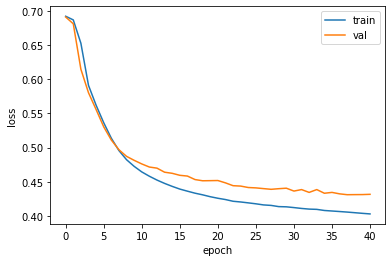

In [23]:
# 훈련 손실과 검증 손실 그래프 그리기
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

## 순환층에 드롭아웃 적용하기

In [24]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3)) # 드롭아웃 적용
model2.add(keras.layers.Dense(1, activation="sigmoid"))

In [25]:
# 모델을 컴파일하고 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss="binary_crossentropy", metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("best-dropout-model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train_seq, train_target, 
    epochs=100, 
    batch_size=64, 
    validation_data=(val_seq, val_target), 
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.4051 - accuracy: 0.8189 - val_loss: 0.4328 - val_accuracy: 0.7986
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.4038 - accuracy: 0.8191 - val_loss: 0.4346 - val_accuracy: 0.7950
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.4031 - accuracy: 0.8182 - val_loss: 0.4300 - val_accuracy: 0.8050
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.4022 - accuracy: 0.8189 - val_loss: 0.4297 - val_accuracy: 0.8014
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.4013 - accuracy: 0.8199 - val_loss: 0.4284 - val_accuracy: 0.8030
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.4009 - accuracy: 0.8185 - val_loss: 0.4283 - val_accuracy: 0.8054
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.3994 - accuracy: 0.8202 - val_loss: 0.4287 - val_accuracy: 0.807

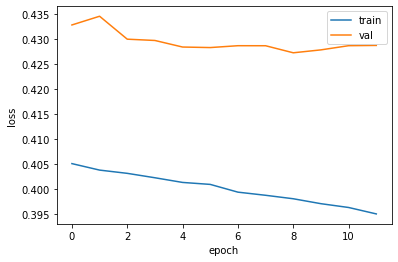

In [26]:
# 훈련 손실과 검증 손실 그래프 그리기
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

## 2개의 층을 연결하기

In [27]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation="sigmoid"))

In [28]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_7 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_8 (LSTM)               (None, 8)                 544       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [29]:
# 모델을 컴파일하고 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss="binary_crossentropy", metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("best-2rnn-model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train_seq, train_target, 
    epochs=100, 
    batch_size=64, 
    validation_data=(val_seq, val_target), 
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.3969 - accuracy: 0.8232 - val_loss: 0.4276 - val_accuracy: 0.8022
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.3957 - accuracy: 0.8235 - val_loss: 0.4267 - val_accuracy: 0.8066
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.3949 - accuracy: 0.8227 - val_loss: 0.4317 - val_accuracy: 0.8058
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.3942 - accuracy: 0.8249 - val_loss: 0.4288 - val_accuracy: 0.8058
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.3938 - accuracy: 0.8231 - val_loss: 0.4274 - val_accuracy: 0.8024
